In [1]:
# GENERAL THINGS FOR COMPUTING AND PLOTTING
import pandas as pd
import numpy as np
import os, sys, time
from datetime import datetime
from datetime import timedelta
import scipy as sp

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")

# ibl specific things
import datajoint as dj
from ibl_pipeline import subject, acquisition
ephys = dj.create_virtual_module('ephys', 'ibl_ephys')

pd.set_option('display.max_rows', 1000)

Connecting anneurai@datajoint.internationalbrainlab.org:3306


In [7]:
# all mice that made it to ready4ephys
all_ephys_sess = (subject.Subject * subject.SubjectLab * \
                  (acquisition.SessionProject & \
                   'session_project = "ibl_neuropixel_brainwide_01"') * \
                                  (acquisition.Session & 'task_protocol LIKE "%ephysChoiceWorld%"') \
                 & ephys.DefaultCluster)
all_ephys_sess = all_ephys_sess.proj('subject_nickname', 'subject_birth_date', 'lab_name',
                    age_at_rec='DATEDIFF(session_start_time, subject_birth_date) / 30')

all_ephys_sess = all_ephys_sess.fetch(format='frame').reset_index()
all_ephys_sess = all_ephys_sess[~all_ephys_sess['age_at_rec'].isnull()]
all_ephys_sess['too_old'] = all_ephys_sess['age_at_rec'] > 7
all_ephys_sess['age_at_rec'] = all_ephys_sess['age_at_rec'].astype(float)



In [8]:
all_ephys_sess.groupby(['lab_name'])['age_at_rec'].describe()
#all_ephys_sess.groupby(['age_at_rec'])['subject_nickname'].unique()

,count,mean,std,min,25%,50%,75%,max
lab_name,,,,,,,,
angelakilab,17.0,6.627453,1.150251,4.8667,5.000000,7.06670,7.500000,7.7333
churchlandlab,49.0,5.806122,1.025526,4.6333,5.033300,5.66670,6.266700,9.0000
cortexlab,21.0,6.777776,0.898046,5.4667,5.600000,7.30000,7.400000,7.6667
danlab,42.0,6.505557,1.508978,4.5000,5.475025,6.11665,6.691675,10.8000
hoferlab,16.0,7.243750,0.697790,6.3000,6.450025,7.26665,7.741650,8.6333
mainenlab,16.0,6.085413,1.160389,5.4000,5.491675,5.70000,5.908325,9.0333
mrsicflogellab,10.0,8.783330,1.122080,7.7667,7.941650,8.01665,10.058350,10.1333
wittenlab,3.0,7.433333,0.176415,7.2333,7.366650,7.50000,7.533350,7.5667
zadorlab,23.0,7.189861,1.704289,4.5333,6.250000,6.86670,9.116650,9.3667


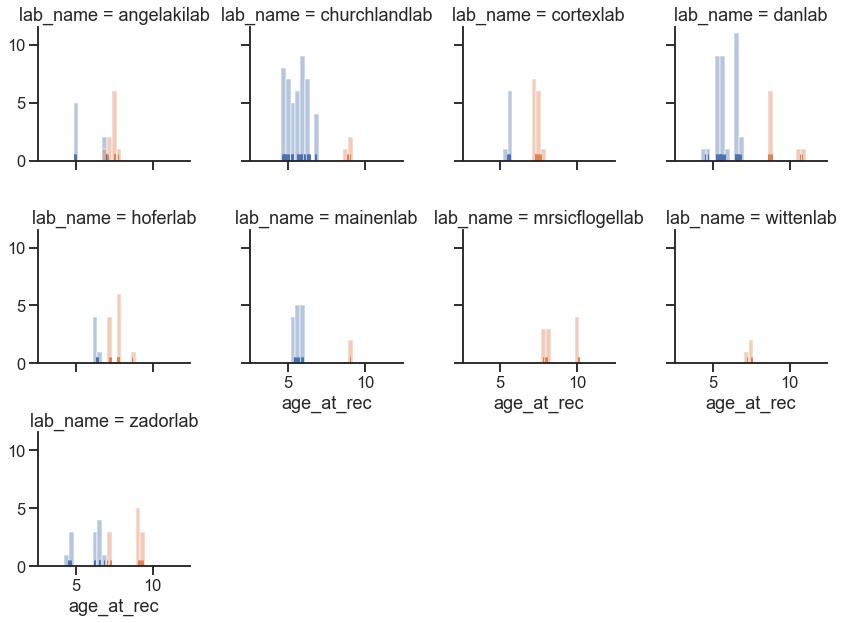

In [9]:
g = sns.FacetGrid(all_ephys_sess, col="lab_name", hue='too_old', col_wrap=4)
g = g.map(sns.distplot, "age_at_rec", rug=True, kde=False, bins=np.linspace(3, 12, 30))

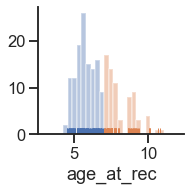

In [10]:
g = sns.FacetGrid(all_ephys_sess, hue='too_old')
g = g.map(sns.distplot, "age_at_rec", rug=True, kde=False, bins=np.linspace(3, 12, 30))

In [11]:
all_ephys_sess.groupby(['lab_name', 'subject_nickname', 'too_old'])['age_at_rec'].describe()

count       mean       std      min  \
lab_name       subject_nickname too_old                                        
angelakilab    NYU-11           False      2.0   6.983350  0.023547   6.9667   
                                True       3.0   7.066667  0.033350   7.0333   
               NYU-12           False      5.0   4.933340  0.052699   4.8667   
               NYU-21           True       4.0   7.558325  0.119777   7.4667   
               NYU-26           True       3.0   7.533333  0.033350   7.5000   
churchlandlab  CSHL045          False      4.0   6.783325  0.043029   6.7333   
               CSHL047          False      5.0   5.686660  0.121549   5.5667   
               CSHL049          False      6.0   5.250000  0.062347   5.1667   
               CSHL051          False      4.0   5.933325  0.071983   5.8667   
               CSHL052          False      5.0   6.333340  0.052699   6.2667   
               CSHL053          False      4.0   5.700000  0.072013   5.6333   
               CSHL054          False      2.0   6.083350  0.023547   6.0667   
               CSHL055          False      2.0   6.283350  0.023547   6.2667   
               CSHL058          True       3.0   8.922233  0.069376   8.8667   
               CSHL059          False      8.0   4.741663  0.070709   4.6333   
               CSHL060          False      6.0   4.966667  0.078878   4.8667   
cortexlab      KS014            True       5.0   7.300000  0.052715   7.2333   
               KS016            True       5.0   7.346660  0.069103   7.2667   
               KS020            True       4.0   7.566675  0.072029   7.5000   
               KS022            False      2.0   5.550000  0.023617   5.5333   
               KS023            False      5.0   5.546660  0.069103   5.4667   
danlab         DY_006           True       2.0  10.733350  0.094257  10.6667   
               DY_008           False      3.0   6.633333  0.033350   6.6000   
               DY_009           False     10.0   6.620000  0.134434   6.4333   
               DY_010           False     12.0   5.411117  0.143789   5.2000   
               DY_011           False      7.0   5.600000  0.144023   5.4000   
               DY_013           False      2.0   4.600000  0.141421   4.5000   
               DY_014           True       6.0   8.722217  0.072004   8.6333   
hoferlab       SWC_014          False      5.0   6.373340  0.064134   6.3000   
               SWC_015          True       6.0   7.750000  0.062347   7.6667   
               SWC_021          True       1.0   8.633300       NaN   8.6333   
               SWC_042          True       4.0   7.225000  0.056914   7.1667   
mainenlab      ZM_1897          False      5.0   5.900000  0.052715   5.8333   
               ZM_2240          False      4.0   5.450000  0.043042   5.4000   
               ZM_2241          False      4.0   5.658325  0.056919   5.6000   
               ZM_2245          False      1.0   5.400000       NaN   5.4000   
               ZM_3001          True       2.0   9.016650  0.023547   9.0000   
mrsicflogellab SWC_018          True       4.0  10.083325  0.043029  10.0333   
               SWC_023          True       4.0   7.983325  0.043029   7.9333   
               SWC_038          True       2.0   7.783350  0.023547   7.7667   
wittenlab      ibl_witten_13    True       1.0   7.233300       NaN   7.2333   
               ibl_witten_14    True       2.0   7.533350  0.047164   7.5000   
zadorlab       CSH_ZAD_001      True       4.0   9.116675  0.043029   9.0667   
               CSH_ZAD_011      False      3.0   6.233333  0.033350   6.2000   
               CSH_ZAD_017      False      1.0   6.866700       NaN   6.8667   
               CSH_ZAD_019      True       4.0   9.291675  0.073913   9.2000   
               CSH_ZAD_021      True       2.0   7.250000  0.023617   7.2333   
               CSH_ZAD_022      False      4.0   6.550000  0.043042   6.5000   
               CSH_ZAD_024      True     